Authors: Team Drop It Like It's Null
Team Members:
Lee Manning
Jakob Theis
Michelle Flores Sanchez
Nicholas Robertson

Dataset: "Uber Ride Analytics Dataset 2024"
Found on: Kaggle.com


Compiled by: Yash Dev Laddha
Last updated: 2025

In [ ]:
#Import frequently-used Python libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# This is a way to download it that should work for everyone:

!gdown --id 1fvXvZt4S4JBycmnG_jUXNDknFluSAZ4k #this is the ID of the shared .csv file for Uber data. It just comes from the link and is the same for everyone.

baseDS = pd.read_csv('ncr_ride_bookings.csv') #This just reads the file based on the name

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1fvXvZt4S4JBycmnG_jUXNDknFluSAZ4k
To: /content/ncr_ride_bookings.csv
100% 25.5M/25.5M [00:00<00:00, 46.3MB/s]


In [ ]:
#Create alias datasets for each team member to work with
LMds = baseDS.copy()
JTds = baseDS.copy()
MFSds = baseDS.copy()
NRds = baseDS.copy()


In [ ]:
#testing aliases
MFSds.head()


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


# **Research Question 1**
Can ride cancellations be predicted based on factors like vehicle type, distances, cancellation history, and ratings?










---

###Data Cleaning and creating new variables




In [ ]:
#Remove locations from dataset. To be explored in a different section
LMds = LMds.drop(['Pickup Location', 'Drop Location'], axis=1)

#Remove cancellation/Incomplete reasons columns, as they do not predict cancellations and prejudice models
#These columns only exist if the corresponding option in "Booking Status" is chosen, making them extremely redundant
LMds = LMds.drop(['Driver Cancellation Reason', 'Reason for cancelling by Customer', 'Incomplete Rides Reason', 'Cancelled Rides by Driver', 'Cancelled Rides by Customer', 'Incomplete Rides'], axis=1)

#Remove columns that contain null values for all but 1 booking status
LMds = LMds.drop(['Driver Ratings', 'Customer Rating'], axis=1)

#We can remove other superfluous columns
LMds = LMds.drop(['Booking ID', 'Customer ID'], axis=1)

#Derive additional variables: Day_of_Week, Is_Weekend, Is_Rush_Hour from the original “Time” and “Date”
LMds['Date'] = pd.to_datetime(LMds['Date'])
LMds['Time'] = pd.to_datetime(LMds['Time'])
LMds['Hour_of_Day'] = LMds['Time'].dt.hour.astype(int)
LMds['Is_Rush_Hour'] = LMds['Time'].dt.hour.apply(lambda x: 1 if 7 <= x <= 9 or 16 <= x <= 19 else 0)
LMds['Day_of_Week'] = LMds['Date'].dt.day_name()
LMds['Is_Weekend'] = LMds['Day_of_Week'].isin(['Saturday', 'Sunday'])

#Drop Date and Time columns now that derived variables have been calculated
LMds = LMds.drop(['Date', 'Time'], axis=1)
LMds.head()

/tmp/ipython-input-1428487547.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  LMds['Time'] = pd.to_datetime(LMds['Time'])


,Booking Status,Vehicle Type,Avg VTAT,Avg CTAT,Booking Value,Ride Distance,Payment Method,Hour_of_Day,Is_Rush_Hour,Day_of_Week,Is_Weekend
0,No Driver Found,eBike,NaN,NaN,NaN,NaN,NaN,12,0,Saturday,True
1,Incomplete,Go Sedan,4.9,14.0,237.0,5.73,UPI,18,1,Friday,False
2,Completed,Auto,13.4,25.8,627.0,13.58,Debit Card,8,1,Friday,False
3,Completed,Premier Sedan,13.1,28.5,416.0,34.02,UPI,17,1,Monday,False
4,Completed,Bike,5.3,19.6,737.0,48.21,UPI,22,0,Monday,False



##Additional Data Exploration
###Perform additional exploration and cleaning of data to prepare for modeling



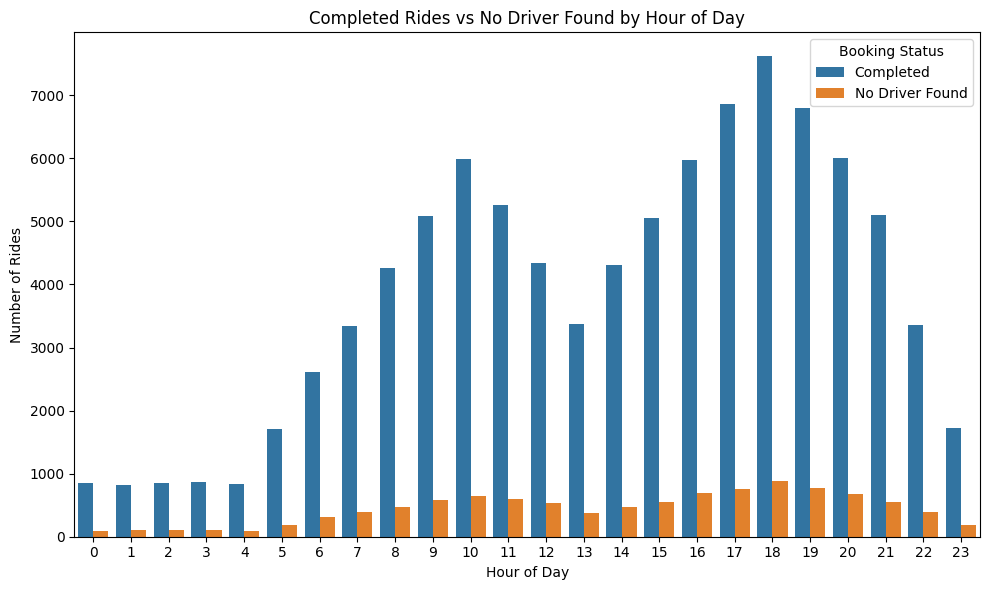

/tmp/ipython-input-3196907941.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  car_ratio = (car_counts.groupby('Booking Status').apply(lambda x: x.assign(Proportion=x['Count'] / x['Count'].sum())).reset_index(drop=True))


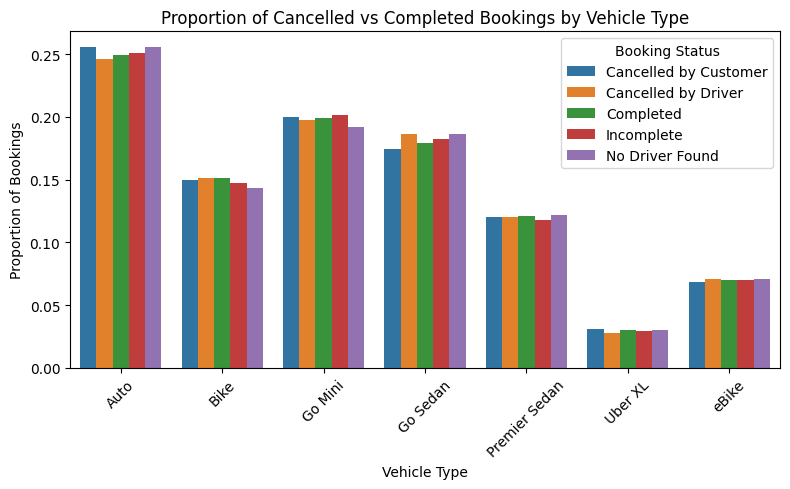

In [ ]:
# Determine if "No Driver Found" happens more during certain times of day by comparing it with a completed rides barchart
    #If "No Driver Found" peaks at different times, it might be caused by something other than supply

compare_df = LMds[LMds['Booking Status'].isin(['No Driver Found', 'Completed'])].copy()

# Group by status and hour
hourly_counts = (compare_df.groupby(['Booking Status', 'Hour_of_Day']).size().reset_index(name='Count'))

# Create side-by-side bars
plt.figure(figsize=(10,6))
sns.barplot(data=hourly_counts,x='Hour_of_Day', y='Count', hue='Booking Status',
            palette=['#1f77b4','#ff7f0e'])
plt.title('Completed Rides vs No Driver Found by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.legend(title='Booking Status')
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()


#Chart to compare contents of "Booking Status" by vehicle type to assess correlation

cancelled_vehicle = LMds[LMds['Booking Status'].isin(['Cancelled by Driver', 'Cancelled by Customer', 'Completed', 'No Driver Found', 'Incomplete'])].copy()
car_counts = (cancelled_vehicle.groupby(['Booking Status', 'Vehicle Type']).size().reset_index(name='Count'))
car_ratio = (car_counts.groupby('Booking Status').apply(lambda x: x.assign(Proportion=x['Count'] / x['Count'].sum())).reset_index(drop=True))

# Plot side-by-side bars, grouped by Booking Status and Vehicle Type
plt.figure(figsize=(8,5))
sns.barplot(data=car_ratio,x='Vehicle Type', y='Proportion', hue='Booking Status', palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title('Proportion of Cancelled vs Completed Bookings by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Proportion of Bookings')
plt.legend(title='Booking Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
"""Because 'No Driver Found' peaks and ebbs with completed rides, it suggests that it is supply-based.
When a ride is incomplete because of 'No Driver Found', no data other than time, vehicle type, and location are recorded
'No Driver Found' can be removed from the dataset for this research question"""

LMds = LMds[LMds['Booking Status'] != 'No Driver Found']

"""Similarly, supply of vehicle types is consistent between all categories of booking status
So, we can remove Vehicle type for this question"""

LMds = LMds.drop('Vehicle Type', axis=1)

In [ ]:
#Assess where null values are in the data
#Count null values in rows labeled by options within booking status
null_table = (LMds.groupby('Booking Status').apply(lambda g: g.isnull().sum()))
print(null_table)

                       Booking Status  Avg VTAT  Avg CTAT  Booking Value  \
Booking Status                                                             
Cancelled by Customer               0         0     10500          10500   
Cancelled by Driver                 0         0     27000          27000   
Completed                           0         0         0              0   
Incomplete                          0         0         0              0   

                       Ride Distance  Payment Method  Hour_of_Day  \
Booking Status                                                      
Cancelled by Customer          10500           10500            0   
Cancelled by Driver            27000           27000            0   
Completed                          0               0            0   
Incomplete                         0               0            0   

                       Is_Rush_Hour  Day_of_Week  Is_Weekend  
Booking Status                                                
Ca

/tmp/ipython-input-590512565.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  null_table = (LMds.groupby('Booking Status').apply(lambda g: g.isnull().sum()))


In [ ]:
#Based on the results of the null table, further examination of the data shows the null values all lie within the Cancellation columns
#We will drop the Driver and Customer Cancellations from the "Booking Status" column to have a cleaner target variable
LMds = LMds[LMds['Booking Status'] != 'Cancelled by Driver']
LMds = LMds[LMds['Booking Status'] != 'Cancelled by Customer']

/tmp/ipython-input-3411644205.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Booking Status', loc='upper right', bbox_to_anchor=(1.25, 1))


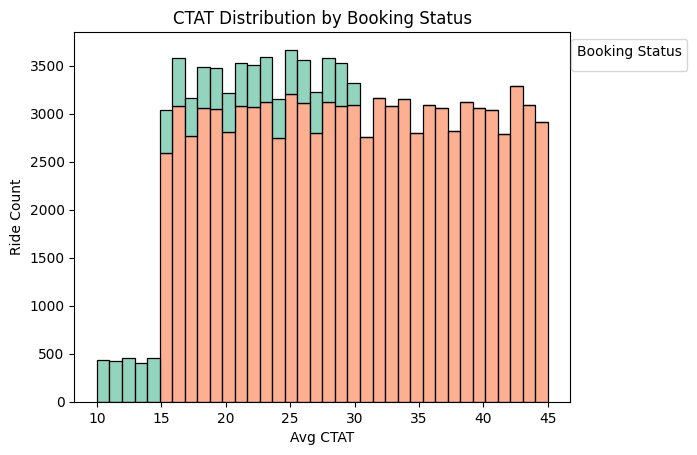

In [ ]:
#Analyze Avg CTAT distribution
sns.histplot(data=LMds[LMds['Booking Status'].isin(['Completed', 'Incomplete', 'Cancelled by Customer', 'Cancelled by Driver'])],
             x='Avg CTAT', hue='Booking Status', bins=36, binrange=(10, 45),
             multiple='stack', palette='Set2', alpha=0.7)
plt.title('CTAT Distribution by Booking Status')
plt.xlabel('Avg CTAT')
plt.ylabel('Ride Count')
plt.legend(title='Booking Status', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

/tmp/ipython-input-2445656119.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Booking Status', loc='upper right', bbox_to_anchor=(1.25, 1))


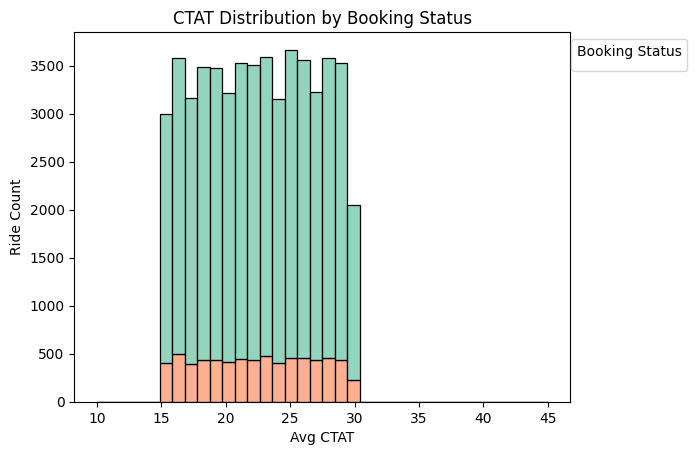

In [ ]:
"""CTAT will cause overfitting by virtue of all values below 15 are 'incomplete' and
all values over 30 are 'Completed'. As such, we will test the data with only those rows
that share CTAT data in both columns."""

#Limit Avg CTAT to values between 15.0 and 30.0
LMds = LMds[(LMds['Avg CTAT'] >= 15.0) & (LMds['Avg CTAT'] <= 30.0)]


#Re-analyze Avg CTAT distribution to confirm
sns.histplot(data=LMds[LMds['Booking Status'].isin(['Completed', 'Incomplete', 'Cancelled by Customer', 'Cancelled by Driver'])],
             x='Avg CTAT', hue='Booking Status', bins=36, binrange=(10, 45),
             multiple='stack', palette='Set2', alpha=0.7)
plt.title('CTAT Distribution by Booking Status')
plt.xlabel('Avg CTAT')
plt.ylabel('Ride Count')
plt.legend(title='Booking Status', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

In [ ]:
#Encode categorical columns "Payment Method" and "Day_of_Week"
LMds = pd.get_dummies(LMds, columns=['Payment Method'], prefix=[''], prefix_sep='')
LMds = pd.get_dummies(LMds, columns=['Day_of_Week'], prefix=[''], prefix_sep='')


#Normalize continuous variables Booking Value, Ride Distance, Avg VTAT, Driver Ratings, Customer Ratings, Avg CTAT to a 0-1 scale
normLM = LMds.copy()
normLM['Booking Value'] = (normLM['Booking Value'] - normLM['Booking Value'].min()) / (normLM['Booking Value'].max() - normLM['Booking Value'].min())
normLM['Ride Distance'] = (normLM['Ride Distance'] - normLM['Ride Distance'].min()) / (normLM['Ride Distance'].max() - normLM['Ride Distance'].min())
normLM['Avg VTAT'] = (normLM['Avg VTAT'] - normLM['Avg VTAT'].min()) / (normLM['Avg VTAT'].max() - normLM['Avg VTAT'].min())
normLM['Avg CTAT'] = (normLM['Avg CTAT'] - normLM['Avg CTAT'].min()) / (normLM['Avg CTAT'].max() - normLM['Avg CTAT'].min())
normLM.head()

,Booking Status,Avg VTAT,Avg CTAT,Booking Value,Ride Distance,Hour_of_Day,Is_Rush_Hour,Is_Weekend,Cash,Credit Card,Debit Card,UPI,Uber Wallet,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
2,Completed,0.876923,0.720000,0.136503,0.256735,8,1,False,False,False,True,False,False,True,False,False,False,False,False,False
3,Completed,0.853846,0.900000,0.086586,0.673878,17,1,False,False,False,False,True,False,False,True,False,False,False,False,False
4,Completed,0.253846,0.306667,0.162527,0.963469,22,0,False,False,False,False,True,False,False,True,False,False,False,False,False
5,Completed,0.238462,0.206667,0.062929,0.078571,9,1,False,False,False,False,True,False,False,False,False,False,False,True,False
6,Completed,0.392308,0.360000,0.139579,0.821224,15,0,False,False,False,False,True,False,False,True,False,False,False,False,False


#Modeling

In [ ]:
#Split data for testing with Booking Status as the target variable
from sklearn.model_selection import train_test_split
X = normLM.drop('Booking Status', axis=1)
y = normLM['Booking Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Binary mapping for ROC (1 = Incomplete)
y_test_bin = y_test.apply(lambda x: 1 if x == 'Incomplete' else 0)

### Logistic Regression

              precision    recall  f1-score   support

   Completed       0.97      0.75      0.85      9302
  Incomplete       0.33      0.86      0.48      1358

    accuracy                           0.76     10660
   macro avg       0.65      0.80      0.66     10660
weighted avg       0.89      0.76      0.80     10660

[[6954 2348]
 [ 192 1166]]
Training Accuracy: 0.7704033771106942
Testing Accuracy: 0.7617260787992496


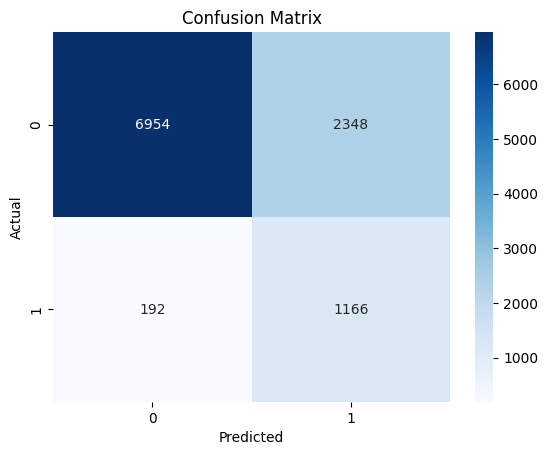

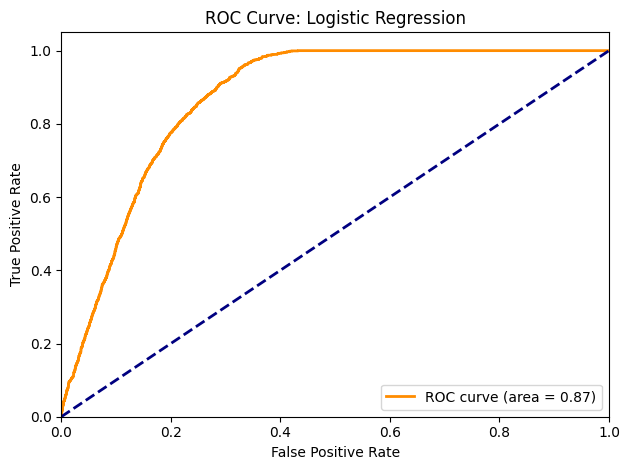

In [ ]:
#Run logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg.fit(X_train, y_train)

y_pred_log = logreg.predict(X_test)
y_proba_log = logreg.predict_proba(X_test)[:, list(logreg.classes_).index('Incomplete')]

print(classification_report(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print("Training Accuracy:", logreg.score(X_train, y_train))
print("Testing Accuracy:", logreg.score(X_test, y_test))


#Confusion Matrix of Logistic Regression model
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Logistic Regression AUC/ROC curve

y_test_bin = y_test.apply(lambda x: 1 if x == 'Incomplete' else 0)

fpr_log, tpr_log, _ = roc_curve(y_test_bin, y_proba_log)
roc_auc_log = auc(fpr_log, tpr_log)

plt.figure()
plt.plot(fpr_log, tpr_log, color='darkorange', lw=2, label='ROC curve (area = %.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Logistic Regression')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

##Random Forests

              precision    recall  f1-score   support

   Completed       0.89      0.97      0.93      9302
  Incomplete       0.49      0.16      0.25      1358

    accuracy                           0.87     10660
   macro avg       0.69      0.57      0.59     10660
weighted avg       0.84      0.87      0.84     10660

[[9068  234]
 [1135  223]]
Training Accuracy: 1.0
Testing Accuracy: 0.8715759849906192


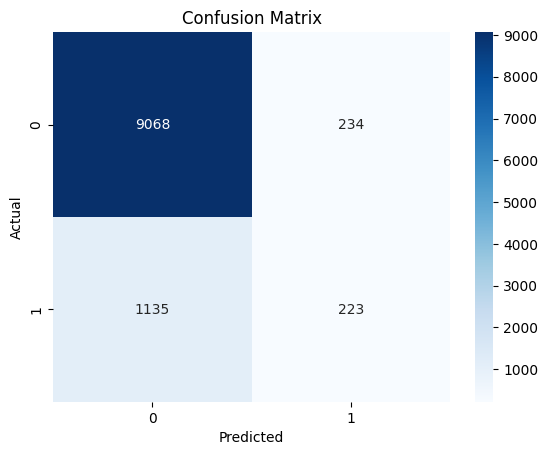

In [ ]:
#Run random forest model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, list(rf.classes_).index('Incomplete')]
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print("Training Accuracy:", rf.score(X_train, y_train))
print("Testing Accuracy:", rf.score(X_test, y_test))

#Visualize results from random forest model
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

   Completed       0.99      0.78      0.87      9302
  Incomplete       0.38      0.96      0.55      1358

    accuracy                           0.80     10660
   macro avg       0.69      0.87      0.71     10660
weighted avg       0.91      0.80      0.83     10660

[[7214 2088]
 [  60 1298]]
Training Accuracy: 0.8164399624765478
Testing Accuracy: 0.798499061913696


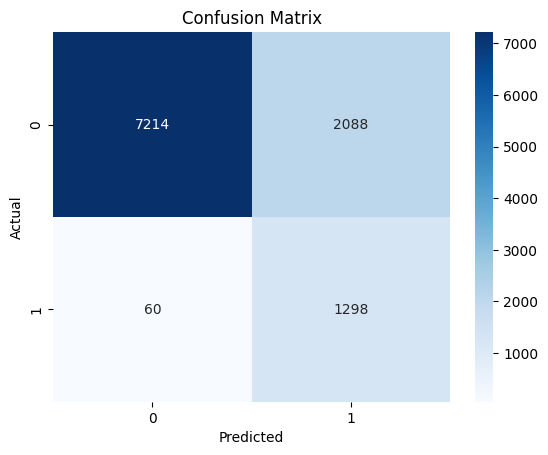

In [ ]:
#Re-run Random Forest with optimized results from previous hyperparameter tuning
#Re-balance with emphasis on "Incomplete" rides

rf_tuned = RandomForestClassifier(class_weight={'Completed': 1, 'Incomplete': 2.5},
                      max_depth=10, min_samples_split=5, n_estimators=300, random_state=42)
rf_tuned.fit(X_train, y_train)

y_pred_tuned = rf_tuned.predict(X_test)
y_proba_tuned = rf_tuned.predict_proba(X_test)[:, list(rf_tuned.classes_).index('Incomplete')]

print(classification_report(y_test, y_pred_tuned))
print(confusion_matrix(y_test, y_pred_tuned))
print("Training Accuracy:", rf_tuned.score(X_train, y_train))
print("Testing Accuracy:", rf_tuned.score(X_test, y_test))

#Confusion Matrix of tuned random forest
cm_tuned  = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


              precision    recall  f1-score   support

   Completed       0.96      0.82      0.88      9302
  Incomplete       0.38      0.79      0.52      1358

    accuracy                           0.81     10660
   macro avg       0.67      0.80      0.70     10660
weighted avg       0.89      0.81      0.84     10660

[[7584 1718]
 [ 290 1068]]
Training Accuracy: 1.0
Testing Accuracy: 0.8116322701688555


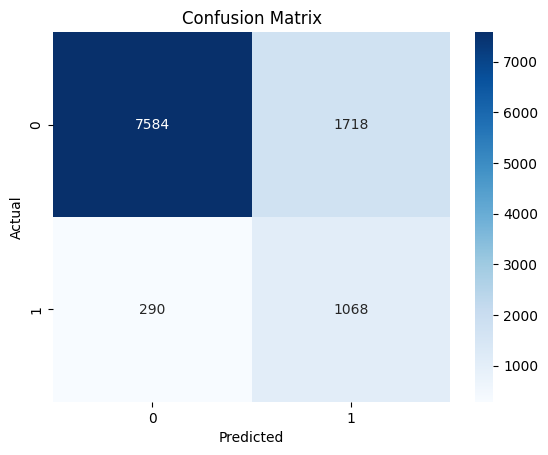

In [ ]:
#Run Random Forest model using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = rf_smote.predict(X_test)

pos_idx = list(rf_smote.classes_).index('Incomplete')
y_proba_smote = rf_smote.predict_proba(X_test)[:, pos_idx]

print(classification_report(y_test, y_pred_smote))
print(confusion_matrix(y_test, y_pred_smote))
print("Training Accuracy:", rf_smote.score(X_train_smote, y_train_smote))
print("Testing Accuracy:", rf_smote.score(X_test, y_test))

#Confusion Matrix of SMOTE random forest
cm_smote = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

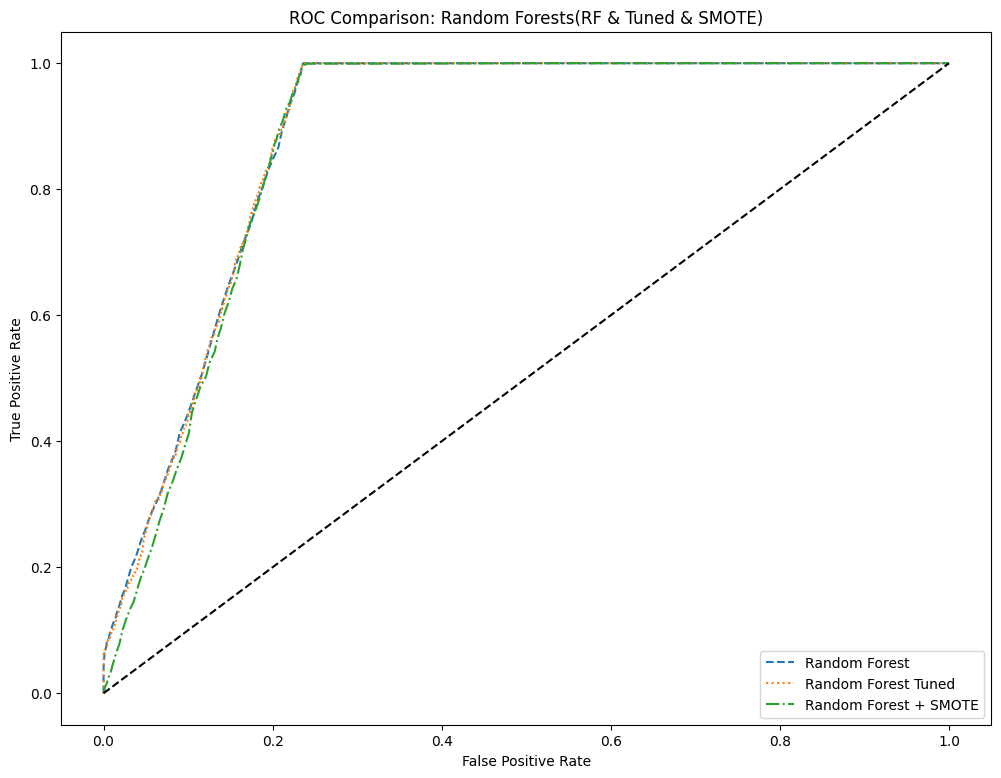

In [ ]:
#Calculate ROC curve for random forest model
y_test_numeric = y_test.apply(lambda x: 1 if x == 'Incomplete' else 0)
y_pred_numeric = rf.predict_proba(X_test)[:, list(rf.classes_).index('Incomplete')]

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test_bin, y_proba_rf)
rf_roc_auc = auc(rf_fpr, rf_tpr)

#Calculate ROC Curve of tuned RF model
y_test_numeric_tuned = y_test.apply(lambda x: 1 if x == 'Incomplete' else 0)
y_pred_numeric_tuned = rf_tuned.predict_proba(X_test)[:, list(rf_tuned.classes_).index('Incomplete')]

rf_fpr_tuned, rf_tpr_tuned, rf_thresholds_tuned = roc_curve(y_test_numeric_tuned, y_pred_numeric_tuned)
rf_roc_auc_tuned = auc(rf_fpr_tuned, rf_tpr_tuned)

#Calculate Roc curve of SMOTE
y_test_bin = y_test.apply(lambda x: 1 if x == 'Incomplete' else 0)
y_proba_smote = rf_smote.predict_proba(X_test)[:, pos_idx]

fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test_bin, y_proba_smote)
roc_auc_smote = auc(fpr_smote, tpr_smote)


#Compare roc curves: rf vs rf_tuned vs rf_smote
rf_fpr, rf_tpr, _ = roc_curve(y_test_bin, y_proba_rf)
rf_fpr_tuned, rf_tpr_tuned, _ = roc_curve(y_test_bin, y_proba_tuned)
rf_fpr_smote, rf_tpr_smote, _ = roc_curve(y_test_bin, y_proba_smote)


plt.figure(figsize=(12,9))
#plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(rf_fpr, rf_tpr, label='Random Forest', linestyle='--')
plt.plot(rf_fpr_tuned, rf_tpr_tuned, label='Random Forest Tuned', linestyle=':')
plt.plot(fpr_smote, tpr_smote, label='Random Forest + SMOTE', linestyle='-.')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Comparison: Random Forests(RF & Tuned & SMOTE)')
plt.legend()
plt.show()











# Gradient Boosting







In [ ]:
#Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_GB = gb.predict(X_test)
print(classification_report(y_test, y_pred_GB))
print(confusion_matrix(y_test, y_pred_GB))
print("Training Accuracy:", gb.score(X_train, y_train))
print("Testing Accuracy:", gb.score(X_test, y_test))


#Calculate ROC curve of Gradient Boosting model
y_test_numeric_gb = y_test.apply(lambda x: 1 if x == 'Incomplete' else 0)
y_pred_proba_gb = gb.predict_proba(X_test)[:, list(gb.classes_).index('Incomplete')]

gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_test_numeric_gb, y_pred_proba_gb)
gb_roc_auc = auc(gb_fpr, gb_tpr)

              precision    recall  f1-score   support

   Completed       0.88      1.00      0.94      9302
  Incomplete       0.92      0.07      0.13      1358

    accuracy                           0.88     10660
   macro avg       0.90      0.53      0.53     10660
weighted avg       0.89      0.88      0.83     10660

[[9294    8]
 [1266   92]]
Training Accuracy: 0.8800422138836773
Testing Accuracy: 0.8804878048780488


In [ ]:
#XGB version
from xgboost import XGBClassifier

y_train_numeric = y_train.apply(lambda x: 1 if x == 'Incomplete' else 0)
y_test_numeric = y_test.apply(lambda x: 1 if x == 'Incomplete' else 0)

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train_numeric)
y_pred_XGB_numeric = xgb.predict(X_test)

y_pred_XGB_labels = pd.Series(y_pred_XGB_numeric).apply(lambda x: 'Incomplete' if x == 1 else 'Completed')

print(classification_report(y_test_numeric, y_pred_XGB_numeric))
print(confusion_matrix(y_test_numeric, y_pred_XGB_numeric))
print("Training Accuracy:", xgb.score(X_train, y_train_numeric))
print("Testing Accuracy:", xgb.score(X_test, y_test_numeric))


#Calculate ROC curve of XGB modeling
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test_numeric, y_proba_xgb)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      9302
           1       0.45      0.22      0.30      1358

    accuracy                           0.87     10660
   macro avg       0.67      0.59      0.61     10660
weighted avg       0.84      0.87      0.85     10660

[[8933  369]
 [1054  304]]
Training Accuracy: 0.937546904315197
Testing Accuracy: 0.8665103189493434


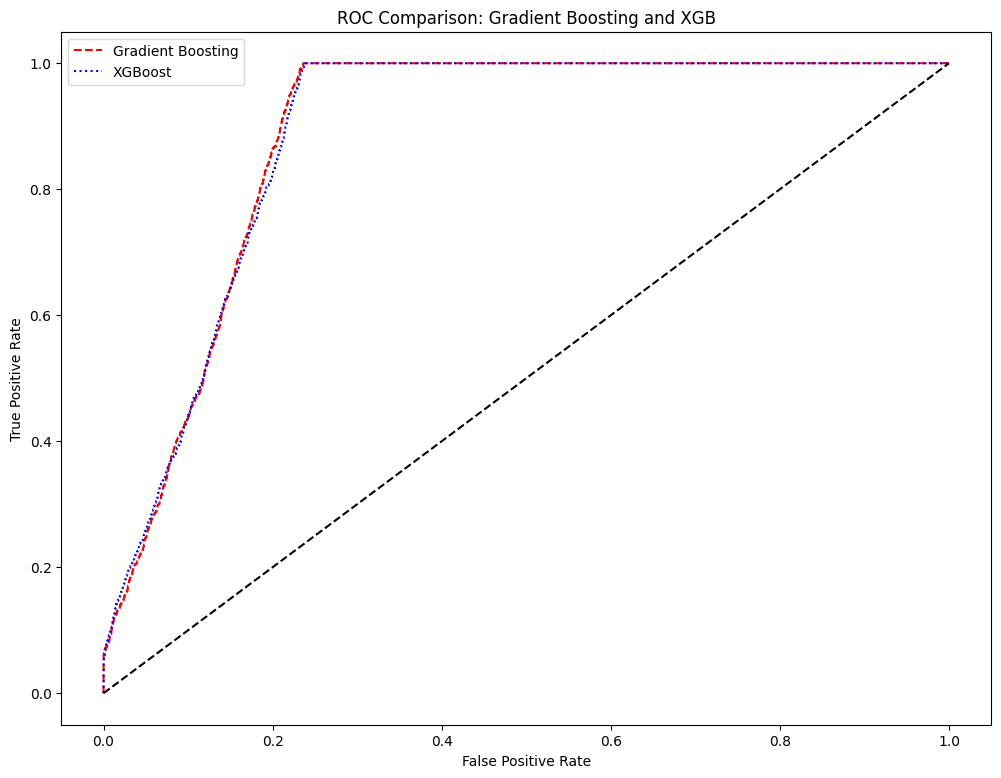

In [ ]:
#Compare gradient boosted and XGB results
plt.figure(figsize=(12,9))
plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting', linestyle='--', color='red')
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost', linestyle=':', color='blue')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Comparison: Gradient Boosting and XGB')
plt.legend()
plt.show()

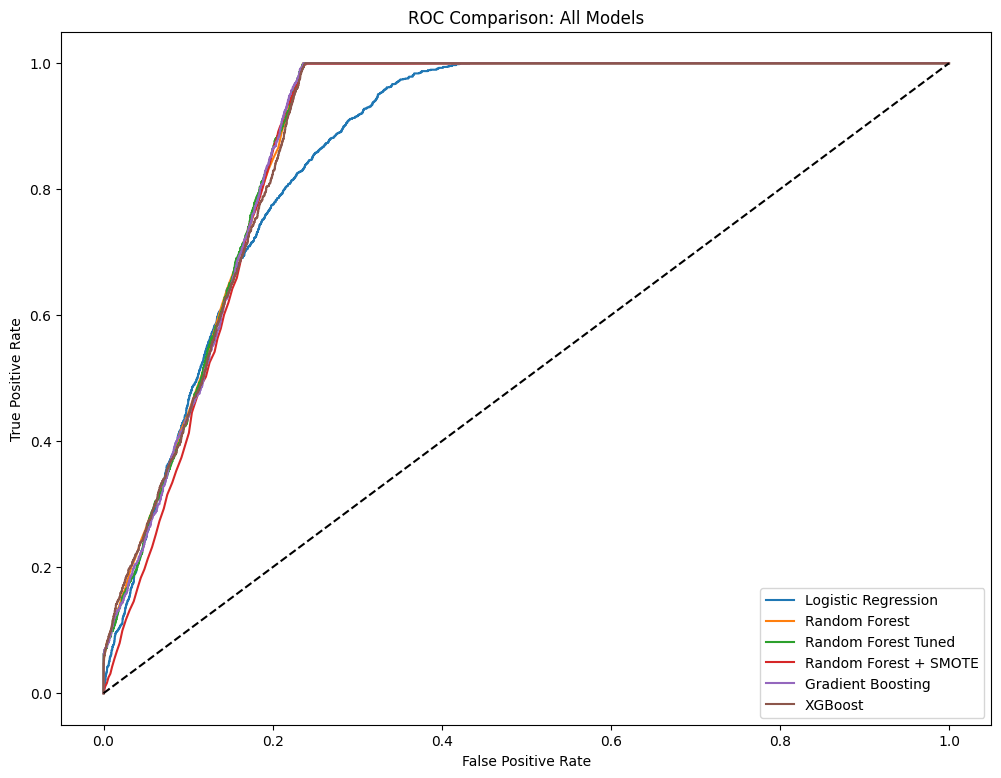

In [ ]:
#ROC Curve of all methods
plt.figure(figsize=(12,9))
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(rf_fpr, rf_tpr, label='Random Forest')
plt.plot(rf_fpr_tuned, rf_tpr_tuned, label='Random Forest Tuned')
plt.plot(fpr_smote, tpr_smote, label='Random Forest + SMOTE')
plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting')
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Comparison: All Models')
plt.legend()
plt.show()

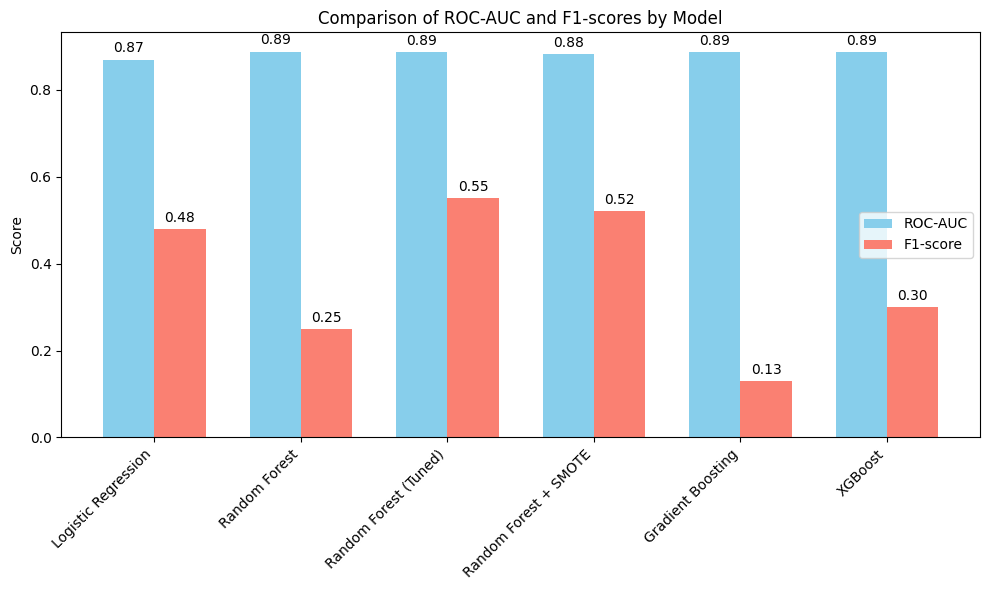

In [ ]:
#Compare ROC and F1 Scores
#Model names and scores
models = ["Logistic Regression","Random Forest","Random Forest (Tuned)",
          "Random Forest + SMOTE", "Gradient Boosting","XGBoost"]

#Scores from earlier testing
roc_auc = [0.8696, 0.8879, 0.8877, 0.8815, 0.8872, 0.8865]
f1_scores = [0.48, 0.25, 0.55, 0.52, 0.13, 0.30]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, roc_auc, width, label='ROC-AUC', color='skyblue')
bars2 = ax.bar(x + width/2, f1_scores, width, label='F1-score', color='salmon')

#Value labels
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Labels and formatting
ax.set_ylabel('Score')
ax.set_title('Comparison of ROC-AUC and F1-scores by Model')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()


In [ ]:
#Coefficient table of features with logistic regression
log_importances = pd.DataFrame({'Feature': X.columns, 'Importance': abs(logreg.coef_[0]), 'Model': 'Logistic Regression'})
log_importances.sort_values('Importance', ascending=False, inplace=True)
log_importances

,Feature,Importance,Model
3,Ride Distance,7.508989,Logistic Regression
0,Avg VTAT,3.676639,Logistic Regression
7,Cash,0.596594,Logistic Regression
17,Tuesday,0.542022,Logistic Regression
10,UPI,0.533726,Logistic Regression
9,Debit Card,0.519649,Logistic Regression
11,Uber Wallet,0.515273,Logistic Regression
8,Credit Card,0.513604,Logistic Regression
13,Monday,0.476479,Logistic Regression
18,Wednesday,0.453189,Logistic Regression


In [ ]:
#Select top features from all models
log_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': abs(logreg.coef_[0])})

rf_feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
rf_tuned_feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_tuned.feature_importances_})
rf_smote_feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_smote.feature_importances_})
gb_feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': gb.feature_importances_})
xgb_feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': xgb.feature_importances_})

top_features = (log_importances_df['Feature'].head(5).tolist())
top_features.extend(rf_feature_importances['Feature'].head(5).tolist())
top_features.extend(rf_tuned_feature_importances['Feature'].head(5).tolist())
top_features.extend(rf_smote_feature_importances['Feature'].head(5).tolist())
top_features.extend(gb_feature_importances_df['Feature'].head(5).tolist())
top_features.extend(xgb_feature_importances_df['Feature'].head(5).tolist())
print(top_features[:5])



# Re-calculate raw importances
log_importances = abs(logreg.coef_[0])
rf_importances = rf.feature_importances_
rf_tuned_importances = rf_tuned.feature_importances_
rf_smote_importances = rf_smote.feature_importances_
gb_feature_importances = gb.feature_importances_
xgb_feature_importances = xgb.feature_importances_

#Re-normalize importances
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_log_importances = scaler.fit_transform(log_importances.reshape(-1, 1)).flatten()
normalized_rf_importances = scaler.fit_transform(rf_importances.reshape(-1, 1)).flatten()
normalized_rf_tuned_importances = scaler.fit_transform(rf_tuned_importances.reshape(-1, 1)).flatten()
normalized_rf_smote_importances = scaler.fit_transform(rf_smote_importances.reshape(-1, 1)).flatten()
normalized_gb_importances = scaler.fit_transform(gb_feature_importances.reshape(-1, 1)).flatten()
normalized_xgb_importances = scaler.fit_transform(xgb_feature_importances.reshape(-1, 1)).flatten()

features = X_train.columns
df_importances = pd.DataFrame({'Feature': features,
                            'Logistic Regression': normalized_log_importances,
                            'Random Forest': normalized_rf_importances,
                            'Random Forest Tuned': normalized_rf_tuned_importances,
                            'Random Forest + SMOTE': normalized_rf_smote_importances,
                            'Gradient Boosting': normalized_gb_importances,
                            'XGBoost': normalized_xgb_importances})

top_features = (df_importances.set_index('Feature').mean(axis=1).sort_values(ascending=False).head(10).index)
df_top = df_importances[df_importances['Feature'].isin(top_features)]


['Avg VTAT', 'Avg CTAT', 'Booking Value', 'Ride Distance', 'Hour_of_Day']


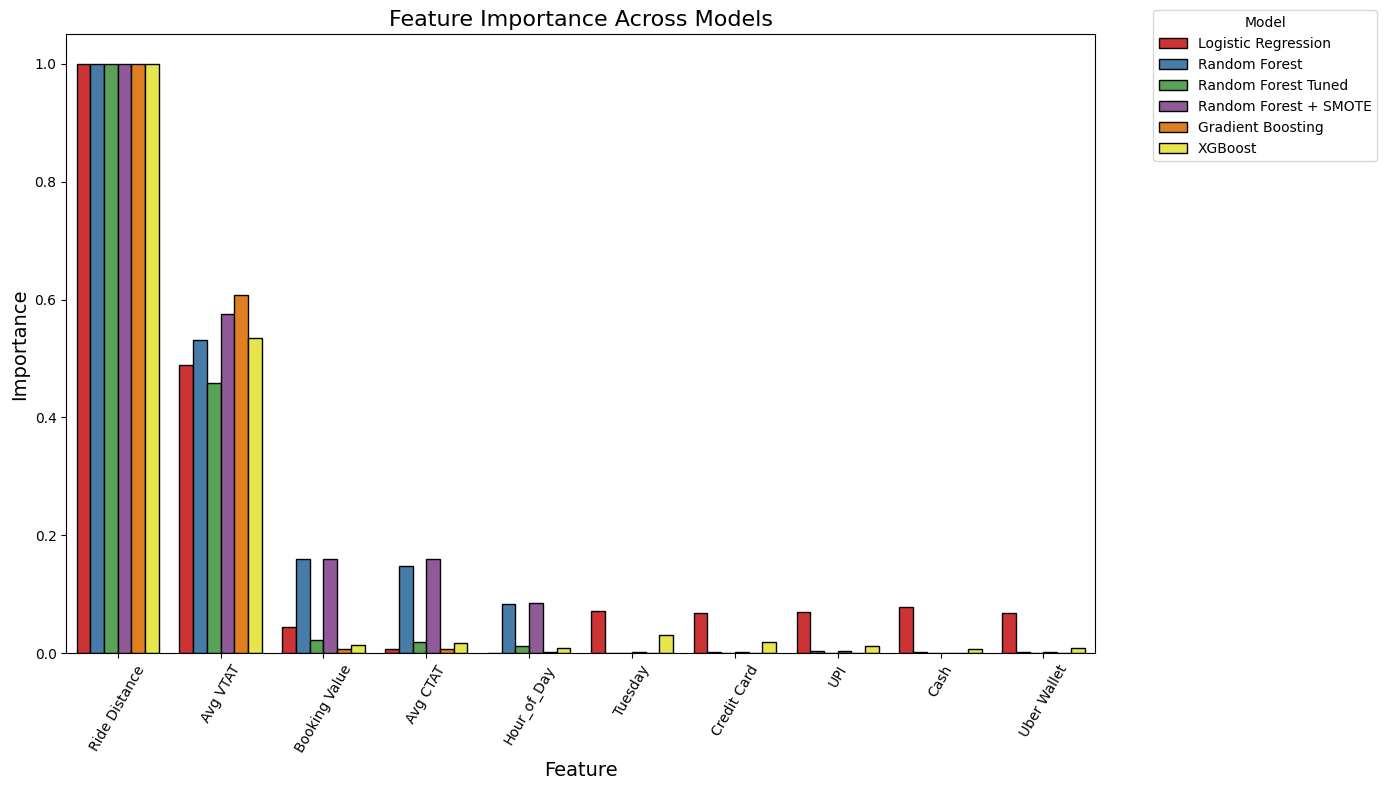

In [ ]:
#Plot grouped bar chart by importance
all_importances = df_top.melt(id_vars='Feature', var_name='Model', value_name='Importance')

plt.figure(figsize=(14, 8))
sns.barplot(data=all_importances, x='Feature', y='Importance', hue='Model', palette='Set1', edgecolor='black', order=top_features)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importance Across Models', fontsize=16)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1.05), loc='upper left')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

# **Research Question 2:**

In [ ]:
JTds = baseDS.copy()
JTds.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix


In [ ]:
# Relevant  features
features = [
    'Vehicle Type', 'Ride Distance', 'Booking Value',
    'Pickup Location', 'Drop Location', 'Avg VTAT', 'Avg CTAT'
]

# Target variable for regression
target = 'Driver Ratings'

# Drop rows with missing target
JTds = JTds.dropna(subset=[target])

# Encode categorical variables
cat_cols = ['Vehicle Type', 'Pickup Location', 'Drop Location']
for col in cat_cols:
    JTds[col] = LabelEncoder().fit_transform(JTds[col].astype(str))

# Scale numerical features
num_cols = ['Ride Distance', 'Booking Value', 'Avg VTAT', 'Avg CTAT']
scaler = StandardScaler()
JTds[num_cols] = scaler.fit_transform(JTds[num_cols])


Regression MSE: 0.197
Ride Distance      0.180145
Booking Value      0.172292
Avg CTAT           0.158683
Drop Location      0.146429
Pickup Location    0.144665
Avg VTAT           0.140016
Vehicle Type       0.057771
dtype: float64


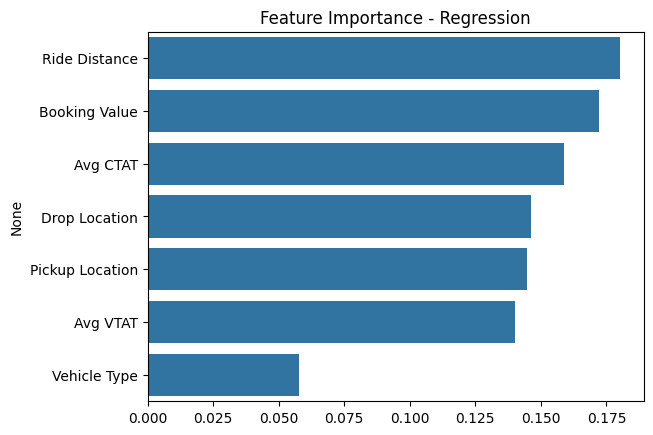

In [ ]:
# Split data
X = JTds[features]
y = JTds[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators = 200, random_state = 0)
rf_reg.fit(X_train, y_train)

# Predictions
y_pred = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Regression MSE: {mse:.3f}")

# Feature importance
importances = pd.Series(rf_reg.feature_importances_, index = features).sort_values(ascending = False)
print(importances)

# Plot feature importance
sns.barplot(x = importances.values, y = importances.index)
plt.title("Feature Importance - Regression")
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        High       0.99      1.00      1.00     18436
         Low       0.00      0.00      0.00       164

    accuracy                           0.99     18600
   macro avg       0.50      0.50      0.50     18600
weighted avg       0.98      0.99      0.99     18600



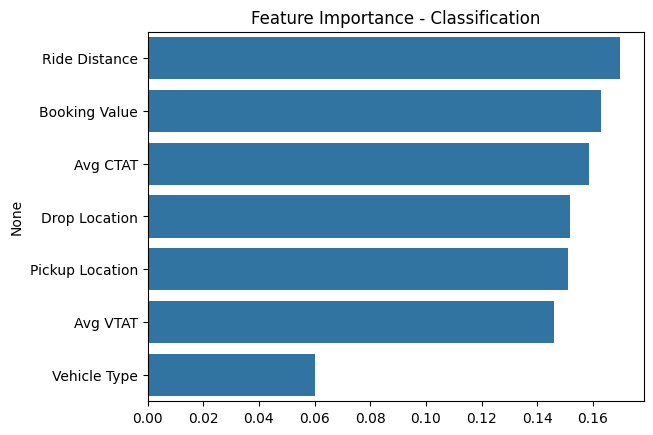

In [ ]:
# Create categorical target
JTds['Rating Category'] = pd.cut(JTds['Driver Ratings'], bins = [0, 3, 5], labels = ['Low', 'High'])

# Split data
X = JTds[features]
y = JTds['Rating Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators = 200,class_weight = 'balanced', random_state = 0)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred = rf_clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Feature importance
importances = pd.Series(rf_clf.feature_importances_, index = features).sort_values(ascending = False)
sns.barplot(x = importances.values, y = importances.index)
plt.title("Feature Importance - Classification")
plt.show()


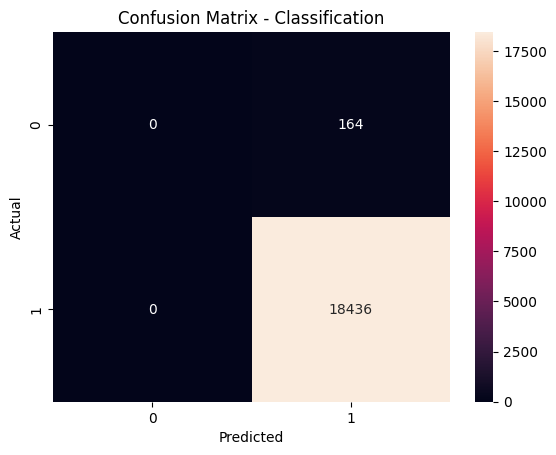

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels = ['Low','High'])
sns.heatmap(cm, annot = True, fmt = 'd')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix - Classification")
plt.show()

# Not good :(

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Re-assign X and y to use the numerical 'Driver Ratings' as the target
# This ensures the regressor receives numerical values, not categorical strings
X = JTds[features]
y = JTds[target] # 'target' is defined as 'Driver Ratings'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

gbr = GradientBoostingRegressor(
    n_estimators = 500, learning_rate = 0.05, max_depth = 4, random_state = 0
)
gbr.fit(X_train, y_train)

# Evaluate performance
y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Regression RMSE: {rmse:.3f}")

Regression RMSE: 0.440


In [ ]:
importances_features = pd.Series(rf_reg.feature_importances_, index = features).sort_values(ascending = False)
print(importances_features)

Ride Distance      0.180145
Booking Value      0.172292
Avg CTAT           0.158683
Drop Location      0.146429
Pickup Location    0.144665
Avg VTAT           0.140016
Vehicle Type       0.057771
dtype: float64


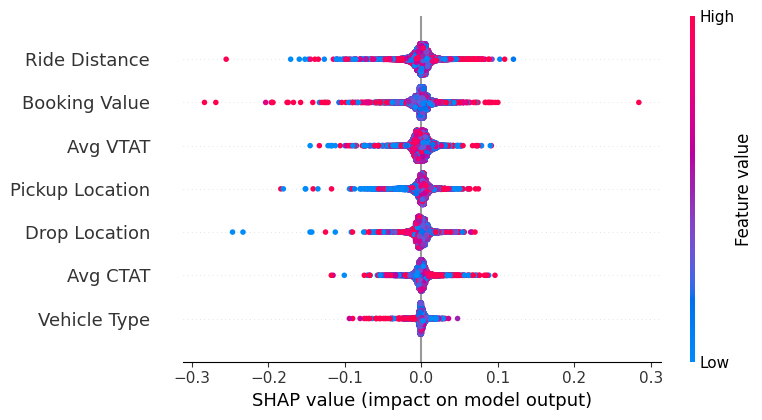

In [ ]:
import shap

# Initialize SHAP explainer
explainer = shap.TreeExplainer(gbr)
shap_values = explainer.shap_values(X_test)

# plot
shap.summary_plot(shap_values, X_test)

# Longer bars mean higher impact. color indicates value (red = high, blue = low)

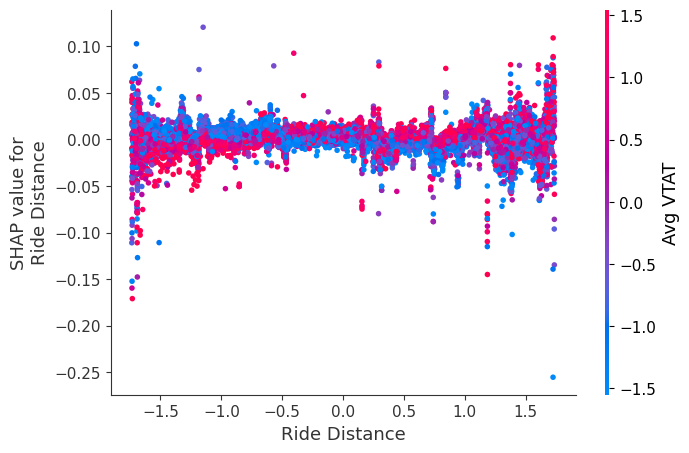

In [ ]:
shap.dependence_plot('Ride Distance', shap_values, X_test)

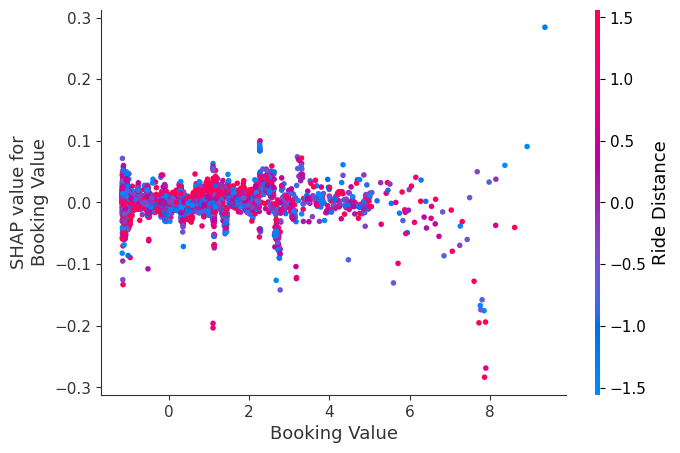

In [ ]:
shap.dependence_plot('Booking Value', shap_values, X_test)

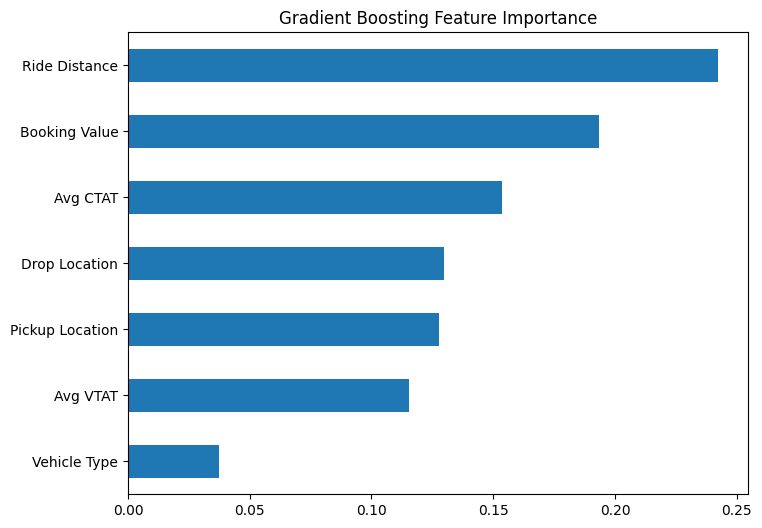

In [ ]:
importances = pd.Series(gbr.feature_importances_, index = features).sort_values()
importances.plot(kind = 'barh', figsize = (8,6), title = "Gradient Boosting Feature Importance")
plt.show()

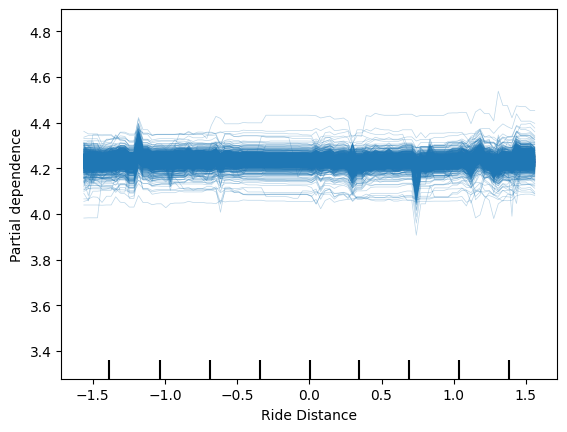

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(gbr, X_train, ['Ride Distance'], kind = 'individual')
plt.show()

# I don't like this graph.

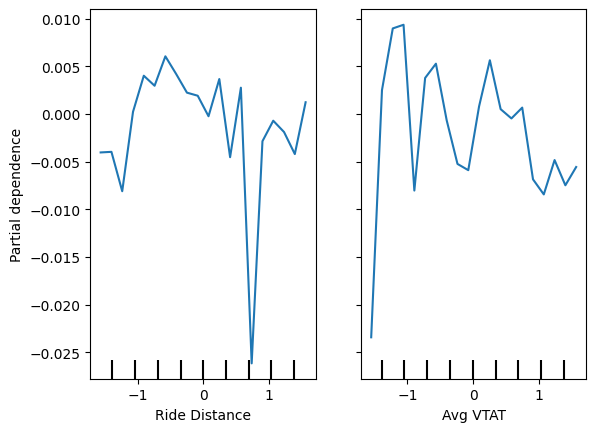

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(
    gbr,
    X_train,
    features = ['Ride Distance', 'Avg VTAT'],
    grid_resolution=20
)
plt.show()


#Research Question 3


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import folium
from folium.plugins import HeatMap
import plotly.express as px

MFSds = baseDS.copy()

# Setting up the plotting style
plt.style.use('default')
sns.set_palette("viridis")

# Show basic dataset info
print("Dataset Shape:", MFSds.shape)
print("\nColumns:", MFSds.columns.tolist())
print("\nBooking Status Value Counts:")
print(MFSds['Booking Status'].value_counts())

Dataset Shape: (150000, 21)

Columns: ['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID', 'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer', 'Reason for cancelling by Customer', 'Cancelled Rides by Driver', 'Driver Cancellation Reason', 'Incomplete Rides', 'Incomplete Rides Reason', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Payment Method']

Booking Status Value Counts:
Booking Status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64


In [ ]:
# Data Prep for Cancellations Analysis

# Cancellation reasons summary
print("Cancellation Reasons Columns:")
print("Customer Cancellation Reason:", MFSds['Reason for cancelling by Customer'].unique()[:10])
print("Driver Cancellation Reason:", MFSds['Driver Cancellation Reason'].unique()[:10])
print("Incomplete Rides Reason:", MFSds['Incomplete Rides Reason'].unique()[:10])

# Unifying cancellation analysis & converting booking status to binary (cancelled vs completed)
MFSds['is_cancelled'] = MFSds['Booking Status'].str.lower().str.contains('cancel', na=False)

# Create a unified cancellation reason column
def get_unified_cancellation_reason(row):
    if pd.notna(row['Reason for cancelling by Customer']):
        return f"Customer: {row['Reason for cancelling by Customer']}"
    elif pd.notna(row['Driver Cancellation Reason']):
        return f"Driver: {row['Driver Cancellation Reason']}"
    elif pd.notna(row['Incomplete Rides Reason']):
        return f"Incomplete: {row['Incomplete Rides Reason']}"
    else:
        return "No Cancellation"

MFSds['Unified_Cancellation_Reason'] = MFSds.apply(get_unified_cancellation_reason, axis=1)

print(f"\nTotal Cancellations: {MFSds['is_cancelled'].sum()}")
print(f"Cancellation Rate: {(MFSds['is_cancelled'].sum() / len(MFSds) * 100):.2f}%")

Cancellation Reasons Columns:
Customer Cancellation Reason: [nan 'Driver is not moving towards pickup location'
 'Driver asked to cancel' 'AC is not working' 'Change of plans'
 'Wrong Address']
Driver Cancellation Reason: [nan 'Personal & Car related issues' 'Customer related issue'
 'More than permitted people in there' 'The customer was coughing/sick']
Incomplete Rides Reason: [nan 'Vehicle Breakdown' 'Other Issue' 'Customer Demand']

Total Cancellations: 37500
Cancellation Rate: 25.00%


Top 10% PICKUP Locations with Highest Cancellation Rates (Threshold: 27.01%):
                      total_rides  cancelled_rides  cancellation_rate
Pickup Location                                                      
Vinobapuri                    823              244              29.65
Akshardham                    839              248              29.56
Munirka                       815              232              28.47
Qutub Minar                   823              233              28.31
Kadarpur                      844              238              28.20
Faridabad Sector 15           831              233              28.04
GTB Nagar                     872              242              27.75
Shahdara                      820              227              27.68
Nehru Place                   885              244              27.57
Karkarduma                    836              230              27.51
Chhatarpur                    829              228              27.50
Keshav Puram

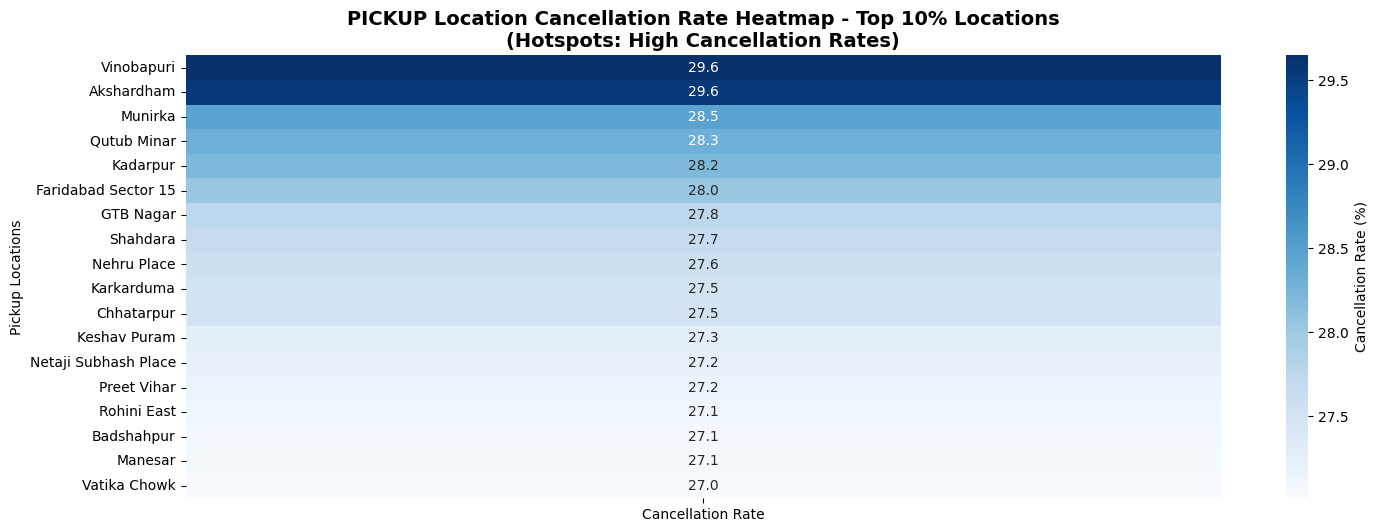

In [ ]:
# ANALYTICAL TECHNIQUE 1: Cancellation Rate Heat Map - PICKUP LOCATION

# Calculate cancellation rates by pickup location
pickup_cancellation_rates = MFSds.groupby('Pickup Location').agg({
    'is_cancelled': ['count', 'sum']
}).round(2)

pickup_cancellation_rates.columns = ['total_rides', 'cancelled_rides']
pickup_cancellation_rates['cancellation_rate'] = (pickup_cancellation_rates['cancelled_rides'] / pickup_cancellation_rates['total_rides'] * 100).round(2)

# Calculate top 10%
top_10_percent_threshold = pickup_cancellation_rates['cancellation_rate'].quantile(0.90)
top_10_percent_locations = pickup_cancellation_rates[pickup_cancellation_rates['cancellation_rate'] >= top_10_percent_threshold]

print(f"Top 10% PICKUP Locations with Highest Cancellation Rates (Threshold: {top_10_percent_threshold:.2f}%):")
print(top_10_percent_locations.sort_values('cancellation_rate', ascending=False))

print(f"\nTotal PICKUP locations analyzed: {len(pickup_cancellation_rates)}")
print(f"Number of PICKUP locations in top 10%: {len(top_10_percent_locations)}")
print(f"Percentage of PICKUP locations in top 10%: {(len(top_10_percent_locations) / len(pickup_cancellation_rates) * 100):.1f}%")

# Create the heatmap data
heatmap_data = pickup_cancellation_rates.reset_index()

# Sort by cancellation rate
heatmap_data = heatmap_data.sort_values('cancellation_rate', ascending=False)

# Create the cancellation rate heatmap
plt.figure(figsize=(15, 10))
pivot_data = heatmap_data.pivot_table(
    values='cancellation_rate',
    index=heatmap_data.index,
    columns=None
)

# Create a categorical heatmap
plt.subplot(2, 1, 1)
sns.heatmap(
    data=[[rate] for rate in heatmap_data['cancellation_rate'].head(18)],
    yticklabels=heatmap_data['Pickup Location'].head(18),
    xticklabels=['Cancellation Rate'],
    cmap='Blues',
    annot=True,
    fmt='.1f',
    cbar_kws={'label': 'Cancellation Rate (%)'}
)
plt.title('PICKUP Location Cancellation Rate Heatmap - Top 10% Locations\n(Hotspots: High Cancellation Rates)', fontsize=14, fontweight='bold')
plt.ylabel('Pickup Locations')
plt.tight_layout()


print(f"\nAnalyzed {len(heatmap_data)} PICKUP locations with more than 10 rides")
print(f"Overall average cancellation rate for PICKUP locations: {heatmap_data['cancellation_rate'].mean():.2f}%")

Top 10% DROP Locations with Highest Cancellation Rates (Threshold: 26.91%):
                    total_rides  cancelled_rides  cancellation_rate
Drop Location                                                      
Vasant Kunj                 802              253              31.55
Gurgaon Sector 29           827              247              29.87
Keshav Puram                839              241              28.72
Bhikaji Cama Place          853              244              28.60
Ardee City                  875              248              28.34
Basai Dhankot               917              258              28.14
Govindpuri                  837              232              27.72
Chhatarpur                  873              242              27.72
Anand Vihar                 830              230              27.71
MG Road                     799              220              27.53
Paharganj                   887              244              27.51
Ghaziabad                   878         

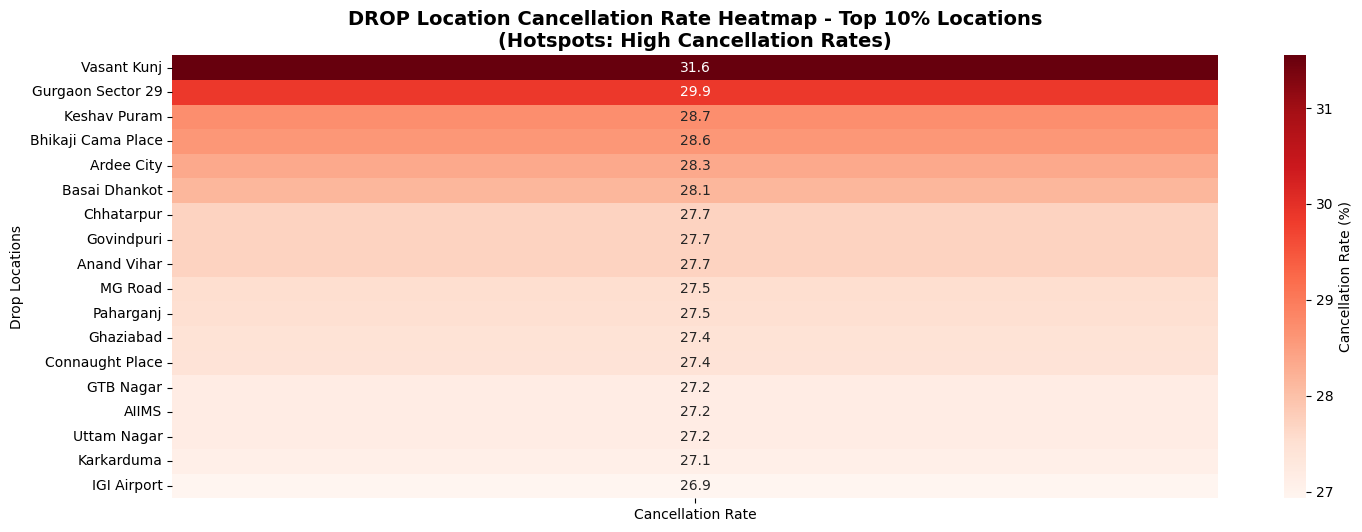

In [ ]:
# ANALYTICAL TECHNIQUE 1: Cancellation Rate Heat Map - DROP LOCATION

# Calculate cancellation rates by drop location
drop_cancellation_rates = MFSds.groupby('Drop Location').agg({
    'is_cancelled': ['count', 'sum']
}).round(2)

drop_cancellation_rates.columns = ['total_rides', 'cancelled_rides']
drop_cancellation_rates['cancellation_rate'] = (drop_cancellation_rates['cancelled_rides'] / drop_cancellation_rates['total_rides'] * 100).round(2)

# Calculate top 10% for drop locations
drop_top_10_percent_threshold = drop_cancellation_rates['cancellation_rate'].quantile(0.90)
drop_top_10_percent_locations = drop_cancellation_rates[drop_cancellation_rates['cancellation_rate'] >= drop_top_10_percent_threshold]

print(f"Top 10% DROP Locations with Highest Cancellation Rates (Threshold: {drop_top_10_percent_threshold:.2f}%):")
print(drop_top_10_percent_locations.sort_values('cancellation_rate', ascending=False))

print(f"\nTotal DROP locations analyzed: {len(drop_cancellation_rates)}")
print(f"Number of DROP locations in top 10%: {len(drop_top_10_percent_locations)}")
print(f"Percentage of DROP locations in top 10%: {(len(drop_top_10_percent_locations) / len(drop_cancellation_rates) * 100):.1f}%")

# Create the heatmap data for drop locations
drop_heatmap_data = drop_cancellation_rates.reset_index()

# Sort by cancellation rate
drop_heatmap_data = drop_heatmap_data.sort_values('cancellation_rate', ascending=False)

# Create the cancellation rate heatmap for drop locations
plt.figure(figsize=(15, 10))

# Create a categorical heatmap for drop locations
plt.subplot(2, 1, 1)
sns.heatmap(
    data=[[rate] for rate in drop_heatmap_data['cancellation_rate'].head(18)],
    yticklabels=drop_heatmap_data['Drop Location'].head(18),
    xticklabels=['Cancellation Rate'],
    cmap='Reds',
    annot=True,
    fmt='.1f',
    cbar_kws={'label': 'Cancellation Rate (%)'}
)
plt.title('DROP Location Cancellation Rate Heatmap - Top 10% Locations\n(Hotspots: High Cancellation Rates)', fontsize=14, fontweight='bold')
plt.ylabel('Drop Locations')
plt.tight_layout()

print(f"\nAnalyzed {len(drop_heatmap_data)} DROP locations with more than 10 rides")
print(f"Overall average cancellation rate for DROP locations: {drop_heatmap_data['cancellation_rate'].mean():.2f}%")

In [ ]:
# ANALYTICAL TECHNIQUE 2: Reason-Specific Heat Map - PICKUP LOCATIONS

# Top 10% of locations with highest cancellation rates
pickup_top_10_percent_rate_threshold = pickup_cancellation_rates['cancellation_rate'].quantile(0.90)
pickup_hotspot_locations = pickup_cancellation_rates[pickup_cancellation_rates['cancellation_rate'] >= pickup_top_10_percent_rate_threshold]

print(f"Top 10% PICKUP cancellation hotspot threshold (by rate): {pickup_top_10_percent_rate_threshold:.2f}%")
print(f"Number of PICKUP hotspot locations: {len(pickup_hotspot_locations)}")
print("\nPICKUP Hotspot Locations (by cancellation rate):")
print(pickup_hotspot_locations.sort_values('cancellation_rate', ascending=False))

# Analyze cancellation reasons in pickup hotspot locations
pickup_hotspot_data = MFSds[MFSds['Pickup Location'].isin(pickup_hotspot_locations.index)]

# Get top cancellation reasons in pickup hotspots
pickup_hotspot_reasons = pickup_hotspot_data[pickup_hotspot_data['is_cancelled']]['Unified_Cancellation_Reason'].value_counts().head(10)

print("\nTop 10 Cancellation Reasons in PICKUP Hotspot Locations:")
print(pickup_hotspot_reasons)

Top 10% PICKUP cancellation hotspot threshold (by rate): 27.01%
Number of PICKUP hotspot locations: 18

PICKUP Hotspot Locations (by cancellation rate):
                      total_rides  cancelled_rides  cancellation_rate
Pickup Location                                                      
Vinobapuri                    823              244              29.65
Akshardham                    839              248              29.56
Munirka                       815              232              28.47
Qutub Minar                   823              233              28.31
Kadarpur                      844              238              28.20
Faridabad Sector 15           831              233              28.04
GTB Nagar                     872              242              27.75
Shahdara                      820              227              27.68
Nehru Place                   885              244              27.57
Karkarduma                    836              230              27.51
Chhatar

In [ ]:
# ANALYTICAL TECHNIQUE 2: Reason-Specific Heat Map - DROP LOCATIONS

# Identify the top 10% of DROP locations with highest cancellation rates
drop_top_10_percent_rate_threshold = drop_cancellation_rates['cancellation_rate'].quantile(0.90)
drop_hotspot_locations = drop_cancellation_rates[drop_cancellation_rates['cancellation_rate'] >= drop_top_10_percent_rate_threshold]

print(f"Top 10% DROP cancellation hotspot threshold (by rate): {drop_top_10_percent_rate_threshold:.2f}%")
print(f"Number of DROP hotspot locations: {len(drop_hotspot_locations)}")
print("\nDROP Hotspot Locations (by cancellation rate):")
print(drop_hotspot_locations.sort_values('cancellation_rate', ascending=False))

# Analyze cancellation reasons in drop hotspot locations
drop_hotspot_data = MFSds[MFSds['Drop Location'].isin(drop_hotspot_locations.index)]

# Get top cancellation reasons in drop hotspots
drop_hotspot_reasons = drop_hotspot_data[drop_hotspot_data['is_cancelled']]['Unified_Cancellation_Reason'].value_counts().head(10)

print("\nTop 10 Cancellation Reasons in DROP Hotspot Locations:")
print(drop_hotspot_reasons)

Top 10% DROP cancellation hotspot threshold (by rate): 26.91%
Number of DROP hotspot locations: 18

DROP Hotspot Locations (by cancellation rate):
                    total_rides  cancelled_rides  cancellation_rate
Drop Location                                                      
Vasant Kunj                 802              253              31.55
Gurgaon Sector 29           827              247              29.87
Keshav Puram                839              241              28.72
Bhikaji Cama Place          853              244              28.60
Ardee City                  875              248              28.34
Basai Dhankot               917              258              28.14
Govindpuri                  837              232              27.72
Chhatarpur                  873              242              27.72
Anand Vihar                 830              230              27.71
MG Road                     799              220              27.53
Paharganj                   887      

In [ ]:
# Reason-specific analysis

def categorize_cancellation_reason(reason):
    reason_str = str(reason).lower()

    # Customer cancellation reasons
    if 'customer:' in reason_str:
        if 'not moving' in reason_str or 'moving towards' in reason_str:
            return 'Driver Not Moving Towards Pickup'
        elif 'driver asked' in reason_str or 'asked to cancel' in reason_str:
            return 'Driver Requested Cancellation'
        elif 'ac is not working' in reason_str or 'ac not working' in reason_str:
            return 'Vehicle AC Not Working'
        elif 'change of plans' in reason_str:
            return 'Customer Change of Plans'
        elif 'wrong address' in reason_str:
            return 'Wrong Address Provided'
        else:
            return 'Other Customer Reasons'

    # Driver cancellation reasons
    elif 'driver:' in reason_str:
        if 'personal' in reason_str or 'car related' in reason_str:
            return 'Driver Personal/Vehicle Issues'
        elif 'customer related' in reason_str:
            return 'Customer Related Issues'
        elif 'permitted people' in reason_str:
            return 'Too Many Passengers'
        elif 'coughing' in reason_str or 'sick' in reason_str:
            return 'Customer Appeared Sick'
        else:
            return 'Other Driver Reasons'

    # Incomplete ride reasons
    elif 'incomplete:' in reason_str:
        if 'vehicle breakdown' in reason_str:
            return 'Vehicle Breakdown'
        elif 'customer demand' in reason_str:
            return 'Customer Demand'
        elif 'other issue' in reason_str:
            return 'Other Operational Issues'
        else:
            return 'Other Incomplete Ride Reasons'

    elif 'no cancellation' in reason_str:
        return 'No Cancellation'
    else:
        return 'Unknown/Other Reason'


In [ ]:
# Apply cancellation reason categorization to both PICKUP and DROP hotspots

# For PICKUP hotspots - use .copy() to avoid warnings
pickup_hotspot_data = pickup_hotspot_data.copy()
pickup_hotspot_data['Cancellation_Category'] = pickup_hotspot_data['Unified_Cancellation_Reason'].apply(categorize_cancellation_reason)

# For DROP hotspots - use .copy() to avoid warnings
drop_hotspot_data = drop_hotspot_data.copy()
drop_hotspot_data['Cancellation_Category'] = drop_hotspot_data['Unified_Cancellation_Reason'].apply(categorize_cancellation_reason)

# Create reason-specific heatmaps
pickup_reason_by_location = pd.crosstab(
    pickup_hotspot_data[pickup_hotspot_data['is_cancelled']]['Pickup Location'],
    pickup_hotspot_data[pickup_hotspot_data['is_cancelled']]['Cancellation_Category'],
    normalize='index'
) * 100

drop_reason_by_location = pd.crosstab(
    drop_hotspot_data[drop_hotspot_data['is_cancelled']]['Drop Location'],
    drop_hotspot_data[drop_hotspot_data['is_cancelled']]['Cancellation_Category'],
    normalize='index'
) * 100

print("PICKUP Hotspots - Cancellation Reason Distribution by Location (%):")
print(pickup_reason_by_location.round(2))

print("\nDROP Hotspots - Cancellation Reason Distribution by Location (%):")
print(drop_reason_by_location.round(2))

PICKUP Hotspots - Cancellation Reason Distribution by Location (%):
Cancellation_Category  Customer Appeared Sick  Customer Change of Plans  \
Pickup Location                                                           
Akshardham                              20.97                      7.26   
Badshahpur                              16.60                      8.09   
Chhatarpur                              16.67                      5.70   
Faridabad Sector 15                     14.59                      5.15   
GTB Nagar                               16.12                      6.61   
Kadarpur                                18.91                      6.72   
Karkarduma                              24.78                      4.35   
Keshav Puram                            16.10                      5.51   
Manesar                                 14.80                      7.62   
Munirka                                 15.52                      6.47   
Nehru Place                     

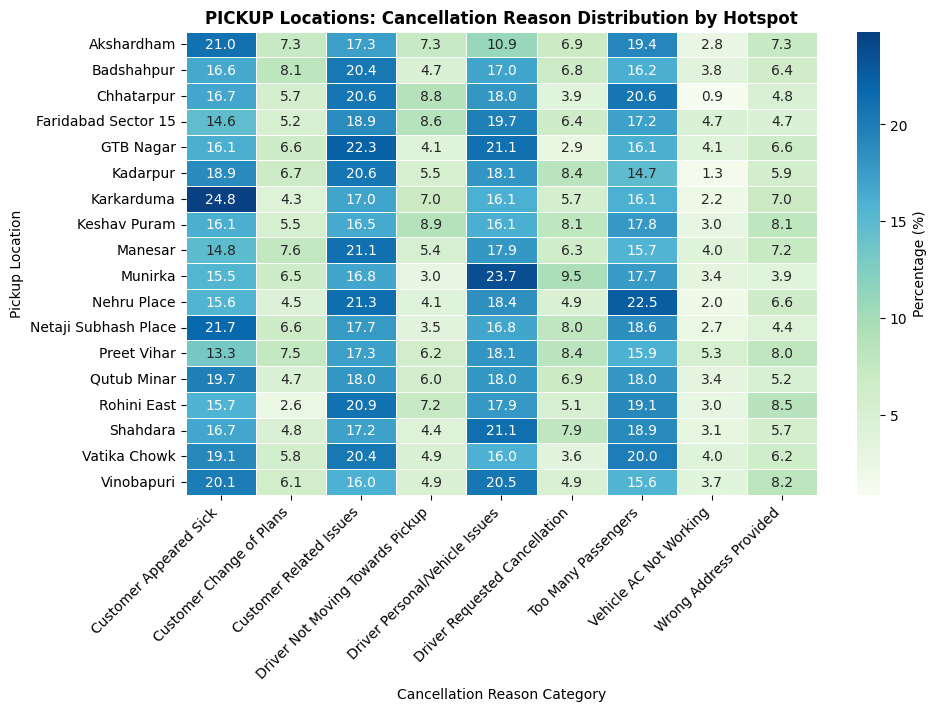

In [ ]:
plt.figure(figsize=(18, 12))

# Plot 1: Heatmap of actual cancellation reasons by PICKUP location
plt.subplot(2, 2, 1)
# Filter to show only PICKUP locations with meaningful data
pickup_reason_filtered = pickup_reason_by_location.loc[pickup_reason_by_location.sum(axis=1) > 0]

if not pickup_reason_filtered.empty:
    sns.heatmap(
        pickup_reason_filtered,
        cmap='GnBu',
        annot=True,
        fmt='.1f',
        cbar_kws={'label': 'Percentage (%)'},
        linewidths=0.5
    )
    plt.title('PICKUP Locations: Cancellation Reason Distribution by Hotspot', fontsize=12, fontweight='bold')
    plt.xlabel('Cancellation Reason Category')
    plt.ylabel('Pickup Location')
    plt.xticks(rotation=45, ha='right')
else:
    plt.text(0.5, 0.5, 'No cancellation reason data available\nfor PICKUP hotspot locations',
             ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
    plt.title('PICKUP: No Cancellation Reason Data in Hotspots', fontsize=12, fontweight='bold')


plt.tight_layout()
plt.show()

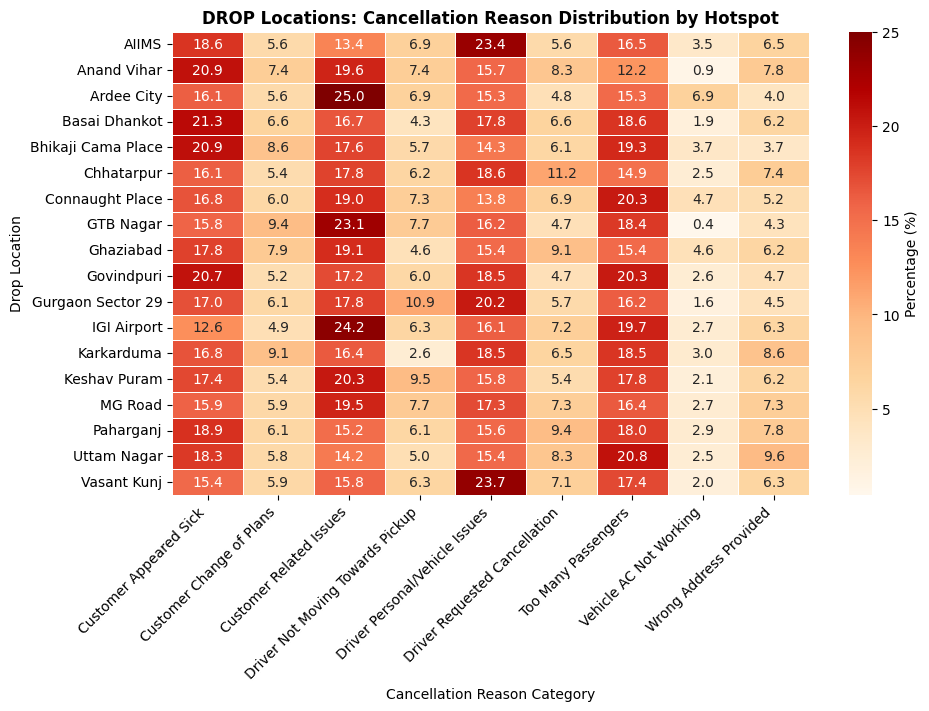

In [ ]:
plt.figure(figsize=(18, 12))

# Plot 1: Heatmap of actual cancellation reasons by DROP location
plt.subplot(2, 2, 1)
# Filter to show only DROP locations with meaningful data
drop_reason_filtered = drop_reason_by_location.loc[drop_reason_by_location.sum(axis=1) > 0]

if not drop_reason_filtered.empty:
    sns.heatmap(
        drop_reason_filtered,
        cmap='OrRd',
        annot=True,
        fmt='.1f',
        cbar_kws={'label': 'Percentage (%)'},
        linewidths=0.5
    )
    plt.title('DROP Locations: Cancellation Reason Distribution by Hotspot', fontsize=12, fontweight='bold')
    plt.xlabel('Cancellation Reason Category')
    plt.ylabel('Drop Location')
    plt.xticks(rotation=45, ha='right')
else:
    plt.text(0.5, 0.5, 'No cancellation reason data available\nfor DROP hotspot locations',
             ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
    plt.title('DROP Locations: No Cancellation Reason Data in Hotspots', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Apply cancellation categorization to drop_hotspot_data first
drop_hotspot_data = drop_hotspot_data.copy()
drop_hotspot_data['Cancellation_Category'] = drop_hotspot_data['Unified_Cancellation_Reason'].apply(categorize_cancellation_reason)

# Comparative analysis between PICKUP and DROP cancellation reasons
print(f"\nPICKUP HOTSPOTS CANCELLATION REASONS:")
print(f"  - Total cancellations in pickup hotspots: {len(pickup_hotspot_data[pickup_hotspot_data['is_cancelled']])}")
print(f"  - Top 3 reasons:")
pickup_top_reasons = pickup_hotspot_data[pickup_hotspot_data['is_cancelled']]['Cancellation_Category'].value_counts().head(3)
for reason, count in pickup_top_reasons.items():
    percentage = (count / len(pickup_hotspot_data[pickup_hotspot_data['is_cancelled']]) * 100)
    print(f"     • {reason}: {count} ({percentage:.1f}%)")

print(f"\nDROP HOTSPOTS CANCELLATION REASONS:")
print(f"  - Total cancellations in drop hotspots: {len(drop_hotspot_data[drop_hotspot_data['is_cancelled']])}")
print(f"  - Top 3 reasons:")
drop_top_reasons = drop_hotspot_data[drop_hotspot_data['is_cancelled']]['Cancellation_Category'].value_counts().head(3)
for reason, count in drop_top_reasons.items():
    percentage = (count / len(drop_hotspot_data[drop_hotspot_data['is_cancelled']]) * 100)
    print(f"     • {reason}: {count} ({percentage:.1f}%)")

print(f"\nREASON DISTRIBUTION COMPARISON:")
print(f"  - Common top reasons: {set(pickup_top_reasons.index) & set(drop_top_reasons.index)}")
print(f"  - Unique to pickup: {set(pickup_top_reasons.index) - set(drop_top_reasons.index)}")
print(f"  - Unique to drop: {set(drop_top_reasons.index) - set(pickup_top_reasons.index)}")


PICKUP HOTSPOTS CANCELLATION REASONS:
  - Total cancellations in pickup hotspots: 4205
  - Top 3 reasons:
     • Customer Related Issues: 795 (18.9%)
     • Driver Personal/Vehicle Issues: 760 (18.1%)
     • Too Many Passengers: 748 (17.8%)

DROP HOTSPOTS CANCELLATION REASONS:
  - Total cancellations in drop hotspots: 4292
  - Top 3 reasons:
     • Customer Related Issues: 790 (18.4%)
     • Customer Appeared Sick: 758 (17.7%)
     • Too Many Passengers: 753 (17.5%)

REASON DISTRIBUTION COMPARISON:
  - Common top reasons: {'Too Many Passengers', 'Customer Related Issues'}
  - Unique to pickup: {'Driver Personal/Vehicle Issues'}
  - Unique to drop: {'Customer Appeared Sick'}


In [ ]:
# PICKUP sources
pickup_sources = pickup_hotspot_data[pickup_hotspot_data['is_cancelled']]['Unified_Cancellation_Reason'].str.split(':').str[0].value_counts()
print(f"\nPICKUP HOTSPOTS - CANCELLATION SOURCES:")
for source, count in pickup_sources.items():
    percentage = (count / pickup_sources.sum()) * 100
    print(f"  • {source}: {count} ({percentage:.1f}%)")

# DROP sources
drop_sources = drop_hotspot_data[drop_hotspot_data['is_cancelled']]['Unified_Cancellation_Reason'].str.split(':').str[0].value_counts()
print(f"\nDROP HOTSPOTS - CANCELLATION SOURCES:")
for source, count in drop_sources.items():
    percentage = (count / drop_sources.sum()) * 100
    print(f"  • {source}: {count} ({percentage:.1f}%)")

# Driver reason comparison
print(f"\nDRIVER CANCELLATION REASON COMPARISON:")
pickup_driver_reasons = pickup_hotspot_data[
    (pickup_hotspot_data['is_cancelled']) &
    (pickup_hotspot_data['Unified_Cancellation_Reason'].str.startswith('Driver:'))
]['Cancellation_Category'].value_counts().head(3)

drop_driver_reasons = drop_hotspot_data[
    (drop_hotspot_data['is_cancelled']) &
    (drop_hotspot_data['Unified_Cancellation_Reason'].str.startswith('Driver:'))
]['Cancellation_Category'].value_counts().head(3)

print(f"PICKUP - Top 3 Driver Reasons:")
for reason, count in pickup_driver_reasons.items():
    percentage = (count / pickup_driver_reasons.sum()) * 100
    print(f"  • {reason}: {count} ({percentage:.1f}%)")

print(f"DROP - Top 3 Driver Reasons:")
for reason, count in drop_driver_reasons.items():
    percentage = (count / drop_driver_reasons.sum()) * 100
    print(f"  • {reason}: {count} ({percentage:.1f}%)")

# Customer reason comparison
print(f"\nCUSTOMER CANCELLATION REASON COMPARISON:")
pickup_customer_reasons = pickup_hotspot_data[
    (pickup_hotspot_data['is_cancelled']) &
    (pickup_hotspot_data['Unified_Cancellation_Reason'].str.startswith('Customer:'))
]['Cancellation_Category'].value_counts().head(3)

drop_customer_reasons = drop_hotspot_data[
    (drop_hotspot_data['is_cancelled']) &
    (drop_hotspot_data['Unified_Cancellation_Reason'].str.startswith('Customer:'))
]['Cancellation_Category'].value_counts().head(3)

print(f"PICKUP - Top 3 Customer Reasons:")
for reason, count in pickup_customer_reasons.items():
    percentage = (count / pickup_customer_reasons.sum()) * 100
    print(f"  • {reason}: {count} ({percentage:.1f}%)")

print(f"DROP - Top 3 Customer Reasons:")
for reason, count in drop_customer_reasons.items():
    percentage = (count / drop_customer_reasons.sum()) * 100
    print(f"  • {reason}: {count} ({percentage:.1f}%)")


PICKUP HOTSPOTS - CANCELLATION SOURCES:
  • Driver: 3044 (72.4%)
  • Customer: 1161 (27.6%)

DROP HOTSPOTS - CANCELLATION SOURCES:
  • Driver: 3045 (70.9%)
  • Customer: 1247 (29.1%)

DRIVER CANCELLATION REASON COMPARISON:
PICKUP - Top 3 Driver Reasons:
  • Customer Related Issues: 795 (34.5%)
  • Driver Personal/Vehicle Issues: 760 (33.0%)
  • Too Many Passengers: 748 (32.5%)
DROP - Top 3 Driver Reasons:
  • Customer Related Issues: 790 (34.3%)
  • Customer Appeared Sick: 758 (32.9%)
  • Too Many Passengers: 753 (32.7%)

CUSTOMER CANCELLATION REASON COMPARISON:
PICKUP - Top 3 Customer Reasons:
  • Wrong Address Provided: 268 (34.2%)
  • Driver Requested Cancellation: 267 (34.1%)
  • Customer Change of Plans: 248 (31.7%)
DROP - Top 3 Customer Reasons:
  • Driver Requested Cancellation: 298 (34.8%)
  • Driver Not Moving Towards Pickup: 280 (32.7%)
  • Customer Change of Plans: 279 (32.6%)


In [ ]:
# Identify locations that appear in both pickup and drop top 10% lists

# Get the location names from both top 10% groups
pickup_top_10_percent_names = set(top_10_percent_locations.index)
drop_top_10_percent_names = set(drop_top_10_percent_locations.index)

# Find intersections
common_hotspots = pickup_top_10_percent_names.intersection(drop_top_10_percent_names)

print("="*80)
print("COMMON CANCELLATION HOTSPOTS")
print("="*80)
print(f"Locations that appear in both PICKUP and DROP top 10% cancellation lists:")
print(f"Number of common hotspots: {len(common_hotspots)}")

if common_hotspots:
    print("\nCommon Hotspot Locations:")
    for i, location in enumerate(sorted(common_hotspots), 1):
        pickup_rate = pickup_cancellation_rates.loc[location, 'cancellation_rate']
        drop_rate = drop_cancellation_rates.loc[location, 'cancellation_rate']
        print(f"  {i}. {location}:")
        print(f"     - As Pickup: {pickup_rate}% cancellation rate")
        print(f"     - As Drop: {drop_rate}% cancellation rate")
        print(f"     - Average: {(pickup_rate + drop_rate) / 2:.2f}% cancellation rate")
else:
    print("No common hotspots found")


COMMON CANCELLATION HOTSPOTS
Locations that appear in both PICKUP and DROP top 10% cancellation lists:
Number of common hotspots: 4

Common Hotspot Locations:
  1. Chhatarpur:
     - As Pickup: 27.5% cancellation rate
     - As Drop: 27.72% cancellation rate
     - Average: 27.61% cancellation rate
  2. GTB Nagar:
     - As Pickup: 27.75% cancellation rate
     - As Drop: 27.18% cancellation rate
     - Average: 27.46% cancellation rate
  3. Karkarduma:
     - As Pickup: 27.51% cancellation rate
     - As Drop: 27.1% cancellation rate
     - Average: 27.30% cancellation rate
  4. Keshav Puram:
     - As Pickup: 27.28% cancellation rate
     - As Drop: 28.72% cancellation rate
     - Average: 28.00% cancellation rate
